In [33]:
import pandas as pd

In [34]:
df = pd.read_json('my_spotify_data/Spotify Extended Streaming History/Streaming_History_Audio_2017-2020_0.json')

In [35]:
df.head()

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2017-03-06T22:51:05Z,Windows 10 (10.0.14393; x64),30550,AU,203.17.201.1,Paris,The Chainsmokers,Paris,spotify:track:15vzANxN8G9wWfwAJLLMCg,None,...,NaN,NaN,NaN,playbtn,logout,False,False,False,NaN,False
1,2017-03-06T22:54:23Z,Windows 10 (10.0.14393; x64),190987,AU,203.17.201.1,Paris,The Chainsmokers,Paris,spotify:track:15vzANxN8G9wWfwAJLLMCg,None,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,NaN,False
2,2017-03-06T22:58:31Z,Windows 10 (10.0.14393; x64),247626,AU,203.17.201.1,Something Just Like This,The Chainsmokers,Something Just Like This,spotify:track:1dNIEtp7AY3oDAKCGg2XkH,None,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,NaN,False
3,2017-03-06T23:01:45Z,Windows 10 (10.0.14393; x64),194080,AU,203.17.201.1,All We Know,The Chainsmokers,All We Know,spotify:track:2rizacJSyD9S1IQUxUxnsK,None,...,NaN,NaN,NaN,trackdone,trackdone,False,False,False,NaN,False
4,2017-03-06T23:03:27Z,Windows 10 (10.0.14393; x64),100416,AU,203.17.201.1,Don't Let Me Down,The Chainsmokers,Don't Let Me Down,spotify:track:1i1fxkWeaMmKEB4T7zqbzK,None,...,NaN,NaN,NaN,trackdone,fwdbtn,False,False,False,NaN,False


In [36]:
import json
import glob
import os
import pandas as pd

all_data = []

# Get all JSON files in the subfolders recursively
json_files = glob.glob(os.path.join("**", "**", "*.json"), recursive=True)

for file in json_files:
    with open(file, encoding="utf-8") as f:
        data = json.load(f)
    
    df = pd.DataFrame(data)

    # Convert 'ts' column to datetime and extract year
    df["ts"] = pd.to_datetime(df["ts"], errors="coerce")  # safely parse dates
    df["year"] = df["ts"].dt.year

    all_data.append(df)

# Combine everything into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)


In [37]:
df = combined_df
df

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,year
0,2017-03-06 22:51:05+00:00,Windows 10 (10.0.14393; x64),30550,AU,203.17.201.1,Paris,The Chainsmokers,Paris,spotify:track:15vzANxN8G9wWfwAJLLMCg,None,...,None,None,playbtn,logout,False,False,False,NaN,False,2017
1,2017-03-06 22:54:23+00:00,Windows 10 (10.0.14393; x64),190987,AU,203.17.201.1,Paris,The Chainsmokers,Paris,spotify:track:15vzANxN8G9wWfwAJLLMCg,None,...,None,None,trackdone,trackdone,False,False,False,NaN,False,2017
2,2017-03-06 22:58:31+00:00,Windows 10 (10.0.14393; x64),247626,AU,203.17.201.1,Something Just Like This,The Chainsmokers,Something Just Like This,spotify:track:1dNIEtp7AY3oDAKCGg2XkH,None,...,None,None,trackdone,trackdone,False,False,False,NaN,False,2017
3,2017-03-06 23:01:45+00:00,Windows 10 (10.0.14393; x64),194080,AU,203.17.201.1,All We Know,The Chainsmokers,All We Know,spotify:track:2rizacJSyD9S1IQUxUxnsK,None,...,None,None,trackdone,trackdone,False,False,False,NaN,False,2017
4,2017-03-06 23:03:27+00:00,Windows 10 (10.0.14393; x64),100416,AU,203.17.201.1,Don't Let Me Down,The Chainsmokers,Don't Let Me Down,spotify:track:1i1fxkWeaMmKEB4T7zqbzK,None,...,None,None,trackdone,fwdbtn,False,False,False,NaN,False,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415501,2025-06-02 21:02:33+00:00,ios,520,DK,185.96.183.195,SHADOW,Parcels,SHADOW,spotify:track:1yKbwpND0LFrVbs61ipyNp,None,...,None,None,unknown,endplay,False,True,False,1.748898e+09,False,2025
415502,2025-06-03 19:23:01+00:00,ios,0,DK,83.137.6.171,SHADOW,Parcels,SHADOW,spotify:track:1yKbwpND0LFrVbs61ipyNp,None,...,None,None,unknown,endplay,False,True,False,1.748979e+09,False,2025
415503,2025-06-03 19:23:02+00:00,ios,0,DK,83.137.6.171,None,None,None,None,#370 - Matt Bennett,...,None,None,unknown,endplay,False,True,False,1.748979e+09,False,2025
415504,2025-06-03 20:16:35+00:00,ios,561,DK,83.137.6.171,None,None,None,None,#370 - Matt Bennett,...,None,None,unknown,endplay,False,True,False,1.748982e+09,False,2025


In [38]:
df.shape

(415506, 24)

In [39]:
print(df.columns)

Index(['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'audiobook_title',
       'audiobook_uri', 'audiobook_chapter_uri', 'audiobook_chapter_title',
       'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline',
       'offline_timestamp', 'incognito_mode', 'year'],
      dtype='object')


In [40]:
df = df[df["ms_played"]>0]

In [41]:
df

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,year
0,2017-03-06 22:51:05+00:00,Windows 10 (10.0.14393; x64),30550,AU,203.17.201.1,Paris,The Chainsmokers,Paris,spotify:track:15vzANxN8G9wWfwAJLLMCg,None,...,None,None,playbtn,logout,False,False,False,NaN,False,2017
1,2017-03-06 22:54:23+00:00,Windows 10 (10.0.14393; x64),190987,AU,203.17.201.1,Paris,The Chainsmokers,Paris,spotify:track:15vzANxN8G9wWfwAJLLMCg,None,...,None,None,trackdone,trackdone,False,False,False,NaN,False,2017
2,2017-03-06 22:58:31+00:00,Windows 10 (10.0.14393; x64),247626,AU,203.17.201.1,Something Just Like This,The Chainsmokers,Something Just Like This,spotify:track:1dNIEtp7AY3oDAKCGg2XkH,None,...,None,None,trackdone,trackdone,False,False,False,NaN,False,2017
3,2017-03-06 23:01:45+00:00,Windows 10 (10.0.14393; x64),194080,AU,203.17.201.1,All We Know,The Chainsmokers,All We Know,spotify:track:2rizacJSyD9S1IQUxUxnsK,None,...,None,None,trackdone,trackdone,False,False,False,NaN,False,2017
4,2017-03-06 23:03:27+00:00,Windows 10 (10.0.14393; x64),100416,AU,203.17.201.1,Don't Let Me Down,The Chainsmokers,Don't Let Me Down,spotify:track:1i1fxkWeaMmKEB4T7zqbzK,None,...,None,None,trackdone,fwdbtn,False,False,False,NaN,False,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415499,2025-06-02 20:55:27+00:00,ios,690,DK,185.96.183.195,SHADOW,Parcels,SHADOW,spotify:track:1yKbwpND0LFrVbs61ipyNp,None,...,None,None,unknown,endplay,False,True,False,1.748898e+09,False,2025
415500,2025-06-02 21:02:33+00:00,ios,60,DK,185.96.183.195,SHADOW,Parcels,SHADOW,spotify:track:1yKbwpND0LFrVbs61ipyNp,None,...,None,None,unknown,endplay,False,True,False,1.748898e+09,False,2025
415501,2025-06-02 21:02:33+00:00,ios,520,DK,185.96.183.195,SHADOW,Parcels,SHADOW,spotify:track:1yKbwpND0LFrVbs61ipyNp,None,...,None,None,unknown,endplay,False,True,False,1.748898e+09,False,2025
415504,2025-06-03 20:16:35+00:00,ios,561,DK,83.137.6.171,None,None,None,None,#370 - Matt Bennett,...,None,None,unknown,endplay,False,True,False,1.748982e+09,False,2025


In [42]:
songs_df = df[df["episode_name"].isnull()]
songs_df

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,year
0,2017-03-06 22:51:05+00:00,Windows 10 (10.0.14393; x64),30550,AU,203.17.201.1,Paris,The Chainsmokers,Paris,spotify:track:15vzANxN8G9wWfwAJLLMCg,None,...,None,None,playbtn,logout,False,False,False,NaN,False,2017
1,2017-03-06 22:54:23+00:00,Windows 10 (10.0.14393; x64),190987,AU,203.17.201.1,Paris,The Chainsmokers,Paris,spotify:track:15vzANxN8G9wWfwAJLLMCg,None,...,None,None,trackdone,trackdone,False,False,False,NaN,False,2017
2,2017-03-06 22:58:31+00:00,Windows 10 (10.0.14393; x64),247626,AU,203.17.201.1,Something Just Like This,The Chainsmokers,Something Just Like This,spotify:track:1dNIEtp7AY3oDAKCGg2XkH,None,...,None,None,trackdone,trackdone,False,False,False,NaN,False,2017
3,2017-03-06 23:01:45+00:00,Windows 10 (10.0.14393; x64),194080,AU,203.17.201.1,All We Know,The Chainsmokers,All We Know,spotify:track:2rizacJSyD9S1IQUxUxnsK,None,...,None,None,trackdone,trackdone,False,False,False,NaN,False,2017
4,2017-03-06 23:03:27+00:00,Windows 10 (10.0.14393; x64),100416,AU,203.17.201.1,Don't Let Me Down,The Chainsmokers,Don't Let Me Down,spotify:track:1i1fxkWeaMmKEB4T7zqbzK,None,...,None,None,trackdone,fwdbtn,False,False,False,NaN,False,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415495,2025-06-01 22:46:32+00:00,ios,400,DK,83.137.6.171,Johnson Song,Mt. Joy,Johnson Song,spotify:track:6X2ng1p0JYrxtBmV82GmS3,None,...,None,None,unknown,endplay,False,True,False,1.748818e+09,True,2025
415497,2025-06-02 17:35:12+00:00,ios,6760,DK,185.96.183.195,Johnson Song,Mt. Joy,Johnson Song,spotify:track:6X2ng1p0JYrxtBmV82GmS3,None,...,None,None,unknown,endplay,False,True,False,1.748886e+09,False,2025
415499,2025-06-02 20:55:27+00:00,ios,690,DK,185.96.183.195,SHADOW,Parcels,SHADOW,spotify:track:1yKbwpND0LFrVbs61ipyNp,None,...,None,None,unknown,endplay,False,True,False,1.748898e+09,False,2025
415500,2025-06-02 21:02:33+00:00,ios,60,DK,185.96.183.195,SHADOW,Parcels,SHADOW,spotify:track:1yKbwpND0LFrVbs61ipyNp,None,...,None,None,unknown,endplay,False,True,False,1.748898e+09,False,2025


In [43]:
podcast_df = df[df["episode_name"].notnull()]
podcast_df

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,year
1275,2017-12-28 03:43:08+00:00,"iOS 11.2.1 (iPhone8,4)",7894,AU,1.129.109.141,None,None,None,None,Tues 24th Oct 2017,...,None,None,clickrow,fwdbtn,False,False,False,NaN,False,2017
1276,2017-12-28 03:43:11+00:00,"iOS 11.2.1 (iPhone8,4)",185,AU,1.129.109.141,None,None,None,None,Fri 1st Dec 2017,...,None,None,fwdbtn,fwdbtn,False,False,False,NaN,False,2017
1277,2017-12-28 03:43:12+00:00,"iOS 11.2.1 (iPhone8,4)",1230,AU,1.129.109.141,None,None,None,None,Thurs 30th Nov 2017,...,None,None,fwdbtn,backbtn,False,False,False,NaN,False,2017
1278,2017-12-28 03:52:47+00:00,"iOS 11.2.1 (iPhone8,4)",570374,AU,1.129.109.141,None,None,None,None,Fri 1st Dec 2017,...,None,None,backbtn,endplay,False,False,False,NaN,False,2017
1279,2017-12-28 04:59:26+00:00,"iOS 11.2.1 (iPhone8,4)",2706355,AU,1.129.109.141,None,None,None,None,Are Men Messier Than Women?,...,None,None,clickrow,endplay,False,False,False,NaN,False,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415482,2024-08-14 03:05:48+00:00,ios,12001,AU,101.188.99.63,None,None,None,None,The Strange Dinosaurs No One Talks About...,...,None,None,unknown,unexpected-exit-while-paused,False,False,None,NaN,False,2024
415484,2024-08-14 03:28:07+00:00,ios,4438,AU,1.145.234.78,None,None,None,None,The Strange Dinosaurs No One Talks About...,...,None,None,unknown,endplay,False,True,None,NaN,False,2024
415486,2025-01-08 14:13:38+00:00,ios,14014,AU,2001:8004:27f1:ae58:9034:340d:40c7:3ea1,None,None,None,None,Billions Club Live with The Weeknd: A Concert ...,...,None,None,unknown,endplay,False,True,False,1.736345e+09,True,2025
415504,2025-06-03 20:16:35+00:00,ios,561,DK,83.137.6.171,None,None,None,None,#370 - Matt Bennett,...,None,None,unknown,endplay,False,True,False,1.748982e+09,False,2025


In [44]:
total_all = df["ms_played"].sum() /1000 /60 /60
total_songs = songs_df["ms_played"].sum() /1000 /60 /60
total_podcasts = podcast_df["ms_played"].sum() /1000 /60 /60

print(f"Total spotify played is {round(total_all,2)} hours or {total_all /24} days")
print(f"Total songs played is {round(total_songs,2)} hours or {total_songs/24} days")
print(f"Total podcasts played is {round(total_podcasts,2)} hours or {total_podcasts/24} days")
print(round(total_podcasts+total_songs,2))

Total spotify played is 19907.15 hours or 829.4646978819443 days
Total songs played is 18558.66 hours or 773.2775563194444 days
Total podcasts played is 1348.49 hours or 56.18714156250001 days
19907.15


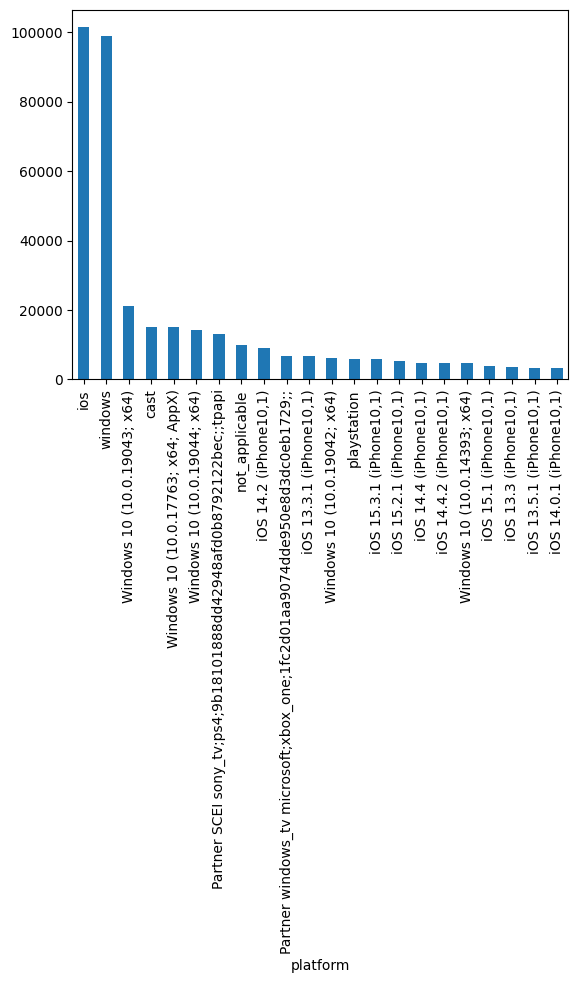

In [45]:
import matplotlib.pyplot as plt
platform_counts = df['platform'].value_counts()
common_platforms = platform_counts[platform_counts > 3000].index

df[df['platform'].isin(common_platforms)]['platform'].value_counts().plot(kind='bar')
plt.show()

In [49]:
total_year = df.groupby('year')["ms_played"].sum() /1000 / 60 / 60
total_year

year
2017     141.494043
2018     499.602872
2019     794.201659
2020    1258.505446
2021    1908.439852
2022    3413.201673
2023    4992.493504
2024    5124.643923
2025    1774.569776
Name: ms_played, dtype: float64

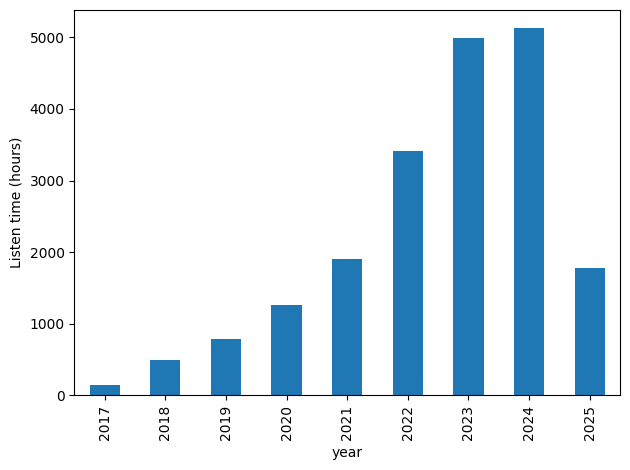

In [51]:
total_year.plot(kind="bar")
plt.ylabel("Listen time (hours)")

plt.tight_layout()
plt.show()

In [53]:
alltime_top_songs = round(df.groupby("master_metadata_track_name")["ms_played"].sum() /1000 / 60,2)
alltime_top_songs = alltime_top_songs.sort_values(ascending=False).head(25)
alltime_top_songs

master_metadata_track_name
1955                                  15322.73
How to Save a Life                     7465.49
Good News                              6250.84
Cooler Than Me (feat. Big Sean)        6214.95
death bed (coffee for your head)       5763.39
Little Talks                           5676.57
Drops of Jupiter (Tell Me)             5562.49
Sweater Weather                        5201.64
The Spins                              5115.83
eyes blue or brown, can't remember     4827.70
Stereo Hearts (feat. Adam Levine)      4604.14
Hell N Back                            4471.11
Money Trees                            4387.97
Sara                                   4127.85
Mr. Rager                              3930.83
Another Love                           3814.02
Pursuit Of Happiness (Nightmare)       3802.26
No. 1 Party Anthem                     3627.98
You’re Gonna Go Far                    3597.96
Sex, Drugs, Etc.                       3524.47
Cigarette Daydreams              

In [55]:
alltime_top_artists = round(df.groupby("master_metadata_album_artist_name")["ms_played"].sum()/1000/60,2)
alltime_top_artists = alltime_top_artists.sort_values(ascending=False).head(25)
alltime_top_artists

master_metadata_album_artist_name
Noah Kahan              45946.78
Zach Bryan              26629.59
Tame Impala             24724.29
Ocean Alley             18646.10
Hilltop Hoods           17484.15
Kid Cudi                17380.49
Mac Miller              16776.85
DOPE LEMON              14985.98
Frank Ocean             14344.68
Arctic Monkeys          13384.01
Mako Road               11751.55
NEIL FRANCES            11502.33
Cigarettes After Sex    11052.60
Spacey Jane             10981.78
Kendrick Lamar          10716.76
Kanye West              10492.25
The Neighbourhood       10444.07
Lil Skies               10253.79
Royel Otis               9426.61
Steve Lacy               9214.07
Childish Gambino         9211.31
The Fray                 9150.07
Jungle                   9147.81
Tyler, The Creator       8511.53
NF                       8026.87
Name: ms_played, dtype: float64

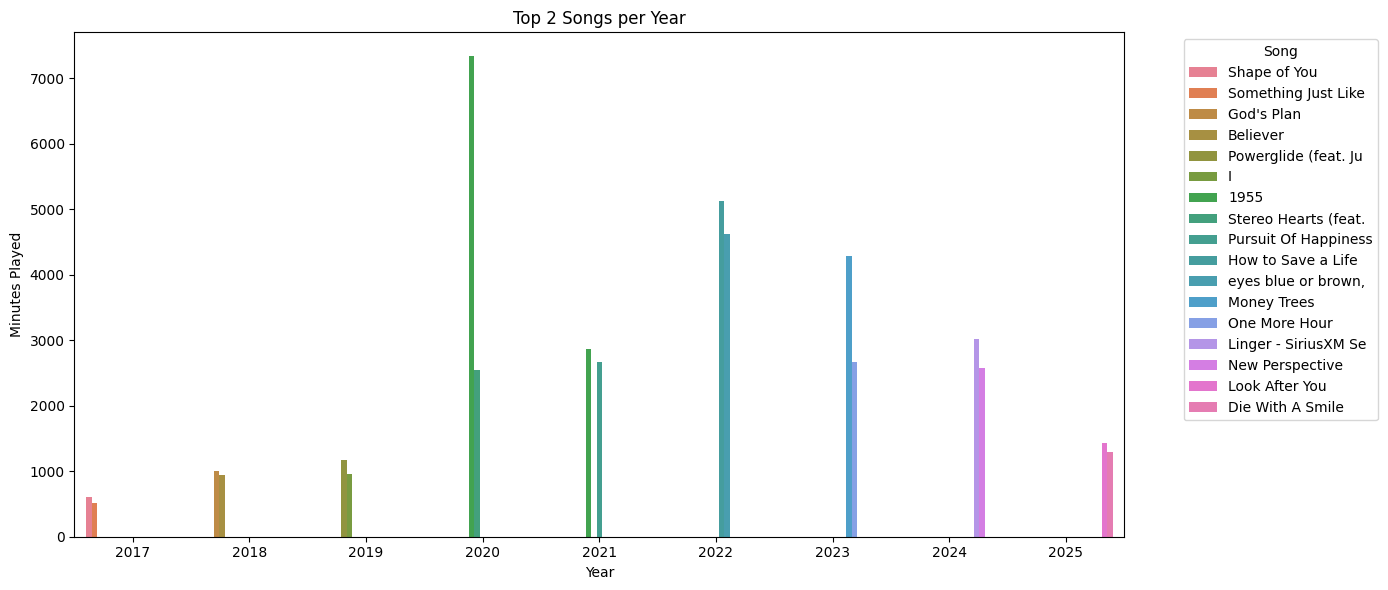

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
top_n = 2

# Step 1: Aggregate
top_songs_per_year = (
    df.groupby(["year", "master_metadata_track_name"])["ms_played"]
    .sum()
    .div(1000 * 60)
    .reset_index()
)

# Step 2: Get top N per year
top_songs_per_year = (
    top_songs_per_year
    .sort_values(["year", "ms_played"], ascending=[True, False])
    .groupby("year")
    .head(top_n)
)

# Optional: Shorten long song names
top_songs_per_year["short_name"] = top_songs_per_year["master_metadata_track_name"].str.slice(0, 20)

# Step 3: Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_songs_per_year,
    x="year",
    y="ms_played",
    hue="short_name",
)

plt.ylabel("Minutes Played")
plt.xlabel("Year")
plt.title(f"Top {top_n} Songs per Year")
plt.legend(title="Song", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [63]:
most_skipped_songs = df.groupby("master_metadata_track_name")["skipped"].sum()
most_skipped_songs = most_skipped_songs.sort_values(ascending=False).head(10)
most_skipped_songs

master_metadata_track_name
Pluto Projector                       204
Fresh Eyes                            168
Sweater Weather                       165
Space Song                            165
Confidence                            141
i wanna be your girlfriend            141
Can I Call You Tonight?               138
eyes blue or brown, can't remember    138
Sweet                                 132
Hot Rod                               132
Name: skipped, dtype: int64

In [80]:
most_skipped_artists = df.groupby("master_metadata_album_artist_name")["skipped"].sum().sort_values(ascending=False).head(10)
most_skipped_artists


master_metadata_album_artist_name
Noah Kahan              1269
Zach Bryan               813
Ocean Alley              798
Tame Impala              735
Cigarettes After Sex     579
Mako Road                420
Kendrick Lamar           417
The Neighbourhood        411
Steve Lacy               396
Olivia Rodrigo           366
Name: skipped, dtype: int64

In [78]:
played_once_tracks = songs_df["master_metadata_track_name"].value_counts()
played_once_names = played_once_tracks[played_once_tracks <3].index

played_once = df[df["master_metadata_track_name"].isin(played_once_names)]
played_once

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,year


In [83]:
top_podcasts = podcast_df.groupby("episode_show_name")["ms_played"].sum().divide(1000).divide(60).divide(60).sort_values(ascending=False).head(10).round(2)
top_podcasts

episode_show_name
The Tiny Meat Gang Podcast                                  397.67
The Bill Simmons Podcast                                    288.62
Hamish & Andy                                               226.92
The Misfits Podcast                                         111.32
The Old Man and the Three with JJ Redick and Tommy Alter     63.11
SideCast                                                     58.38
The Joe Rogan Experience                                     57.63
PHLY Philadelphia Sixers Podcast                             27.77
AFL SuperCoach Masters                                       15.63
The Ringer NBA Show                                          12.83
Name: ms_played, dtype: float64